In [1]:
import pandas as pd
import pyspark as ps
import pyspark.sql.functions
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
nba_df = pd.read_csv('/home/blair/cognixia/AdvancedPhase/DataLake_and_DataWarehouse/nba_cleaned.csv')
nba_df

,person_id,display_first_last,birthdate,school,country,height,weight,season_exp,jersey,position,rosterstatus,team_name,draft_year,draft_round,draft_number,greatest_75_flag
0,51.0,Mahmoud Abdul-Rauf,1969-03-09 00:00:00,Louisiana State,USA,6-1,162.0,9.0,1,Guard,Inactive,Nuggets,1990,1,3,N
1,1505.0,Tariq Abdul-Wahad,1974-11-03 00:00:00,San Jose State,France,6-6,235.0,7.0,9,Forward-Guard,Inactive,Kings,1997,1,11,N
2,203919.0,Jordan Adams,1994-07-08 00:00:00,UCLA,USA,6-5,209.0,3.0,3,Guard,Inactive,Grizzlies,2014,1,22,N
3,912.0,Rafael Addison,1964-07-22 00:00:00,Syracuse,USA,6-8,241.0,6.0,7,Forward,Inactive,Nets,1986,2,39,N
4,201336.0,Blake Ahearn,1984-05-27 00:00:00,Missouri State,USA,6-2,190.0,4.0,2,Guard,Inactive,Heat,Undrafted,Undrafted,Undrafted,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,1627757.0,Stephen Zimmerman,1996-09-09 00:00:00,UNLV,USA,7-0,240.0,2.0,33,Center,Inactive,Magic,2016,2,41,N
1782,1627835.0,Paul Zipser,1994-02-18 00:00:00,Bayern Munich,Germany,6-8,226.0,2.0,16,Forward,Inactive,Bulls,2016,2,48,N
1783,1627790.0,Ante Zizic,1997-01-04 00:00:00,,Croatia,6-10,266.0,4.0,41,Center,Inactive,Cavaliers,2016,1,23,N
1784,78648.0,Bill Zopf,1948-06-07 00:00:00,Duquesne,USA,6-1,170.0,1.0,6,Guard,Inactive,Bucks,1970,2,33,N


In [3]:
nba_greatest_75 = nba_df.loc[nba_df['greatest_75_flag'].eq('Y')]
# nba_greatest_75.groupby(['team_name']).describe()
nba_greatest_75_by_team = nba_greatest_75['team_name']
# nba_greatest_75_by_team = pd.DataFrame(nba_greatest_75_by_team)
nba_greatest_75_by_team.describe()

count         36
unique        20
top       Lakers
freq           8
Name: team_name, dtype: object

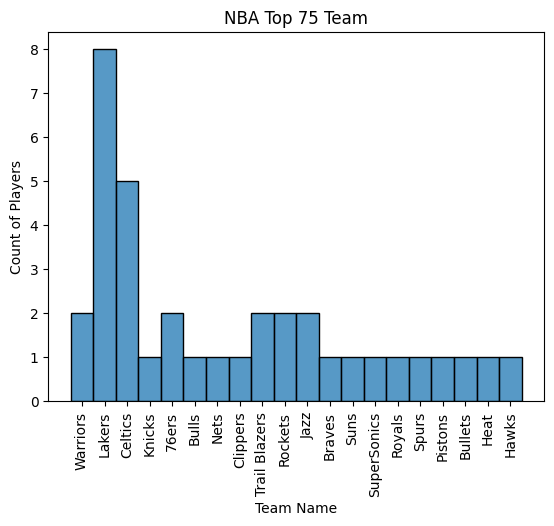

In [4]:
sns.histplot(data=nba_greatest_75_by_team)
plt.title('NBA Top 75 Team')
plt.xlabel('Team Name')
plt.ylabel('Count of Players')
plt.xticks(rotation=90)
plt.show()

In [5]:
warriors = nba_df[nba_df['team_name'].isin(['Warriors'])]
drafted_warriors = warriors.loc[warriors['draft_year'].ne('Undrafted')]
most_current_warriors = drafted_warriors.loc[drafted_warriors['draft_year'].ge('2005')]

drafted_warriors
most_current_warriors

,person_id,display_first_last,birthdate,school,country,height,weight,season_exp,jersey,position,rosterstatus,team_name,draft_year,draft_round,draft_number,greatest_75_flag
68,202357.0,Nemanja Bjelica,1988-05-09 00:00:00,Fenerbahce,Serbia,6-9,234.0,8.0,8,Forward,Inactive,Warriors,2010,2,35,N
541,202724.0,Charles Jenkins,1989-02-28 00:00:00,Hofstra,USA,6-3,215.0,3.0,31,Guard,Inactive,Warriors,2011,2,44,N
548,1629660.0,Ty Jerome,1997-07-08 00:00:00,Virginia,USA,6-5,195.0,3.0,10,Guard-Forward,Active,Warriors,2019,1,24,N
698,1630228.0,Jonathan Kuminga,2002-10-06 00:00:00,NBA G League Ignite,DRC,6-7,225.0,1.0,00,Forward,Active,Warriors,2021,1,7,N
779,1626172.0,Kevon Looney,1996-02-06 00:00:00,UCLA,USA,6-9,222.0,7.0,5,Forward,Active,Warriors,2015,1,30,N
822,1630185.0,Nico Mannion,2001-03-14 00:00:00,Arizona,Italy,6-2,190.0,2.0,2,Guard,Inactive,Warriors,2020,2,48,N
973,203517.0,Nemanja Nedovic,1991-06-16 00:00:00,Lietuvos rytas Vilnius,Serbia,6-3,192.0,2.0,8,Guard,Inactive,Warriors,2013,1,30,N
1053,200785.0,Kosta Perovic,1985-02-19 00:00:00,Partizan,Serbia,7-2,240.0,2.0,19,Center,Inactive,Warriors,2006,2,38,N
1178,1631157.0,Ryan Rollins,2002-07-03 00:00:00,Toledo,USA,6-3,180.0,0.0,2,Guard,Active,Warriors,2022,2,44,N
1296,1629346.0,Alen Smailagic,2000-08-18 00:00:00,Beko,Serbia,6-10,215.0,3.0,6,Forward,Inactive,Warriors,2019,2,39,N


In [6]:
kings = nba_df[nba_df['team_name'].isin(['Kings'])]
drafted_kings = kings.loc[kings['draft_year'].ne('Undrafted')]
most_current_kings = drafted_kings.loc[drafted_kings['draft_year'].ge('2005')]

most_current_kings

,person_id,display_first_last,birthdate,school,country,height,weight,season_exp,jersey,position,rosterstatus,team_name,draft_year,draft_round,draft_number,greatest_75_flag
271,1628368.0,De'Aaron Fox,1997-12-20 00:00:00,Kentucky,USA,6-3,185.0,5.0,5,Guard,Active,Kings,2017,1,5,N
362,201590.0,Donte Greene,1988-02-21 00:00:00,Syracuse,USA,6-11,226.0,6.0,13,Forward,Inactive,Kings,2008,1,28,N
403,203090.0,Maurice Harkless,1993-05-11 00:00:00,"St. John's, N.Y.",USA,6-7,220.0,11.0,8,Forward-Guard,Inactive,Kings,2012,1,15,N
499,1628989.0,Kevin Huerter,1998-08-27 00:00:00,Maryland,USA,6-7,198.0,4.0,9,Guard-Forward,Active,Kings,2018,1,19,N
531,1629713.0,Justin James,1997-01-24 00:00:00,Wyoming,USA,6-7,190.0,3.0,10,Guard-Forward,Inactive,Kings,2019,2,40,N
686,201585.0,Kosta Koufos,1989-02-24 00:00:00,Ohio State,USA,7-0,245.0,12.0,41,Center,Inactive,Kings,2008,1,23,N
708,1627746.0,Skal Labissiere,1996-03-18 00:00:00,Kentucky,Haiti,6-10,235.0,5.0,7,Forward-Center,Inactive,Kings,2016,1,28,N
716,203087.0,Jeremy Lamb,1992-05-30 00:00:00,Connecticut,USA,6-5,180.0,11.0,26,Guard-Forward,Inactive,Kings,2012,1,12,N
719,201171.0,Carl Landry,1983-09-19 00:00:00,Purdue,USA,6-9,248.0,10.0,7,Forward,Inactive,Kings,2007,2,31,N
747,203458.0,Alex Len,1993-06-16 00:00:00,Maryland,Ukraine,7-2,250.0,9.0,25,Center,Active,Kings,2013,1,5,N


In [11]:
young_warriors = most_current_warriors.loc[most_current_warriors['draft_year'].ge('2018')].count()
young_kings = most_current_kings.loc[most_current_kings['draft_year'].ge('2018')].count()

warriors_young_players = young_warriors['display_first_last']
kings_young_players = young_kings['display_first_last']

young_players = [warriors_young_players, kings_young_players]
young_players

warriors = most_current_warriors.loc[most_current_warriors['draft_year'].ge('2018')]
kings = most_current_kings.loc[most_current_kings['draft_year'].ge('2018')]

warriors_team = warriors['team_name']
kings_team = kings['team_name']
players_team = pd.concat([warriors_team, kings_team]).unique()
players_team

array(['Warriors', 'Kings'], dtype=object)

(0.0, 10.0)

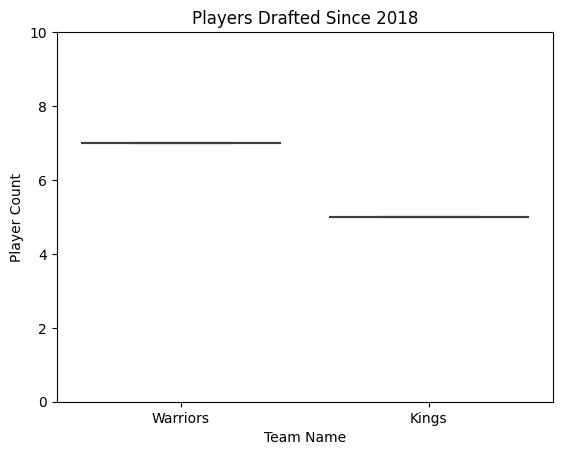

In [13]:
# sns.boxplot(young_players)
# sns.barplot(x=['Warriors', 'Kings'], y=young_players)
sns.boxplot(x=['Warriors', 'Kings'], y=young_players)
plt.title('Players Drafted Since 2018')
plt.xlabel('Team Name')
plt.ylabel('Player Count')
plt.ylim(0, 10)

In [72]:
undrafted_players = nba_df.loc[(nba_df['draft_year'].eq('Undrafted')) & (nba_df['country'].ne('USA'))].count()
drafted_players = nba_df.loc[(nba_df['draft_year'].ne('Undrafted')) & (nba_df['country'].ne('USA'))].count()
drafted_undrafted = pd.concat([undrafted_players, drafted_players])
drafted_undrafted

person_id              45
display_first_last     45
birthdate              45
school                 45
country                45
height                 45
weight                 45
season_exp             45
jersey                 45
position               45
rosterstatus           45
team_name              45
draft_year             45
draft_round            45
draft_number           45
greatest_75_flag       45
person_id             129
display_first_last    129
birthdate             129
school                129
country               129
height                129
weight                129
season_exp            129
jersey                129
position              129
rosterstatus          129
team_name             129
draft_year            129
draft_round           129
draft_number          129
greatest_75_flag      129
dtype: int64

/tmp/ipykernel_641/3910003285.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(drafted_undrafted['draft_year'], loc='lower right', fontsize='13', labels=['Undrafted (45 Total)', 'Drafted (129 Total)'])


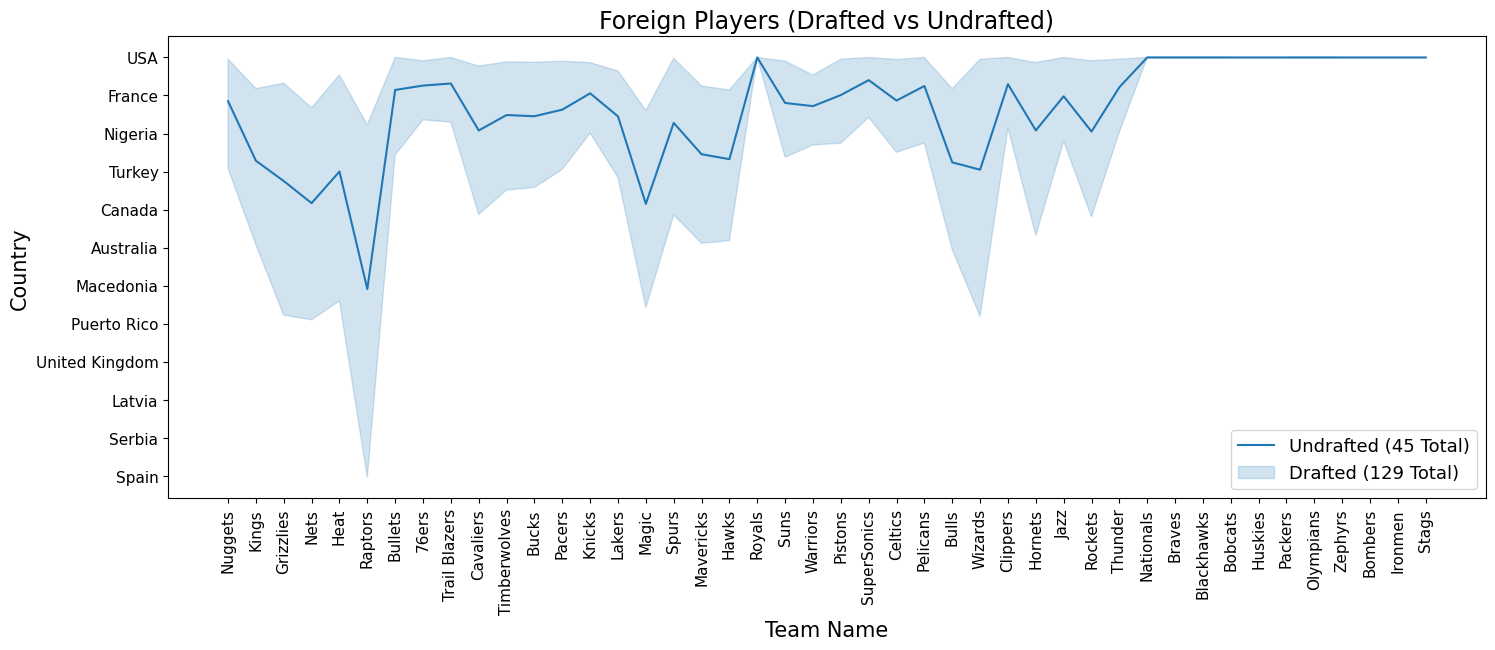

In [125]:
ax = sns.lineplot(drafted_undrafted, x=nba_df['team_name'], y=nba_df['country'])
ax.figure.set_size_inches(17, 6)
plt.title('Foreign Players (Drafted vs Undrafted)', size=17)
plt.legend(drafted_undrafted['draft_year'], loc='lower right', fontsize='13', labels=['Undrafted (45 Total)', 'Drafted (129 Total)'])
plt.xticks(rotation=90, size=11)
plt.yticks(rotation=0, size=11)
plt.xlabel('Team Name', size=15)
plt.ylabel('Country', size=15)
plt.show()